# Cleaning US Census Data

Multiple CSV files need to be imported into the dataset. The data must be cleaned to enable the required calculations and the creation of necessary plots. The project's objective is to identify and fix issues concerning data formats.

## Inspect the Data!

In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import statistics

Having the data in a DataFrame will make it easier for inspection.
The census files available will be loaded into DataFrames using glob and will be looped through. Then all of those DataFrames will be concatenated together into one DataFrame.

In [2]:
import glob
 
files = glob.glob(r'C:\Users\Pedram\Documents\GitHub\Data-Cleansing---US-Census-Data\states*.csv')
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)
us_census = pd.concat(df_list)


Checking data and variables

In [3]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [4]:
#check unique values
print('Unique values: ', us_census.nunique())

Unique values:  Unnamed: 0     6
State         51
TotalPop      51
Hispanic      50
White         51
Black         50
Native        39
Asian         49
Pacific       18
Income        51
GenderPop     51
dtype: int64


In [5]:
print ('Columns :', us_census.columns)
print('Data Types :', us_census.dtypes)

Columns : Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Data Types : Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [6]:
us_census.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
dtype: int64

In [8]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


By Looking at the `.columns` and the `.dtypes` of the `us_census` DataFrame, we realized that the dataset requires cleaning and manipulation to facilitate the analysis. Certain symbols, such as '$' and '_', must be eliminated and the data should be transformed into numeric types.

## Regex to the Rescue

Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [10]:
for index in range(0,len(us_census["Income"])):
    string = str(us_census['Income'].iat[index])
    replace_dol = string.replace('$', '')
    replace_com = replace_dol.replace(',', '')
    us_census['Income'].iat[index] = replace_com

us_census["Income"] = pd.to_numeric(us_census['Income'])
us_census["Income"]

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
Name: Income, dtype: float64

   Split the `GenderPop`column into `Men`, and the `Women` column using `str.split` and separating out those results. Additionaly, remove non-numeric characters and convert both of the columns into numerical datatypes.

In [11]:
Men = []
Women = []
for index in range(0,len(us_census["GenderPop"])):
    string = us_census['GenderPop'].iat[index]
    replace_1 = string.replace('M','')
    replace_2 = replace_1.replace('F','')
    replace = replace_2.split('_')

#    print(replace)
#    print(index, string)
    Men.append(replace[0])
    Women.append(replace[1])
us_census['Men'] = Men
us_census["Men"] = pd.to_numeric(us_census['Men'])

us_census['Women'] = Women
us_census['Women'] = pd.to_numeric(us_census['Women'])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


In [12]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       57 non-null     float64
dtypes: float64(2), int64(3), object(8)
memory usage: 6.6+ KB


Check for `nan` values and replacing them with proper value.

In [14]:
us_census.Women.isnull().sum()

3

In [26]:
us_census.Women = us_census.Women.fillna(us_census.TotalPop - us_census.Men)

In [29]:
us_census.Women.isnull().sum()

0

Check to see if there is any duplicated values and drop them if there is any.

In [35]:
print('Number of Duplicated Values: ', us_census.duplicated(subset = us_census.columns[1:]).sum())

Number of Duplicated Values:  9


In [44]:
census = us_census.drop_duplicates(subset = us_census.columns[1:])

In [62]:
print('Number of Duplicated Values: ', census.duplicated(subset = us_census.columns[1:]).sum())

Number of Duplicated Values:  0


Create a scatterplot with values of `women` and the `income` to check if the plot can be created properly.

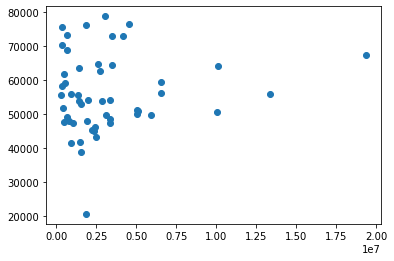

<Figure size 432x288 with 0 Axes>

In [49]:
plt.scatter(census.Women, census.Income)
plt.show()
plt.clf()

Creating Histogram for the 'race' column in this dataset.

In [50]:
census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

The columns should be transformed into a numerical format, and the percentage signs need to be eliminated. Furthermore, attention should be given to substituting NaN values with meaningful information. Considering the possibility that duplicate rows were removed for the previous graph, it might be worthwhile to verify for duplicate rows once more.

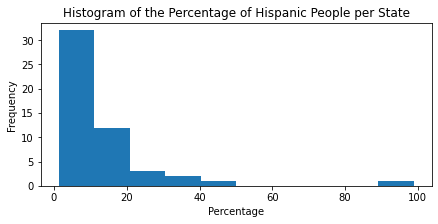

<Figure size 432x288 with 0 Axes>

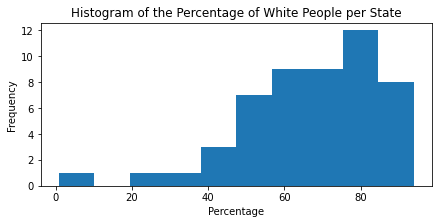

<Figure size 432x288 with 0 Axes>

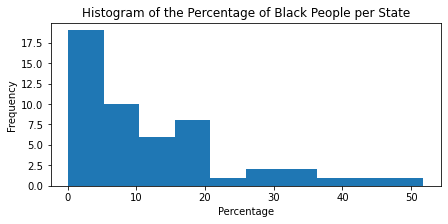

<Figure size 432x288 with 0 Axes>

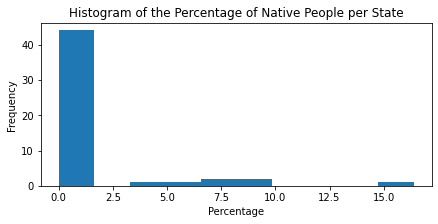

<Figure size 432x288 with 0 Axes>

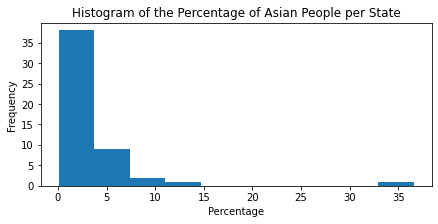

<Figure size 432x288 with 0 Axes>

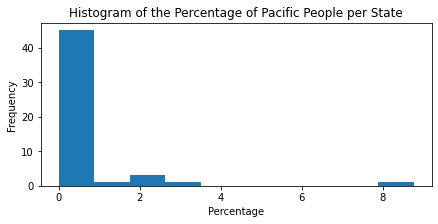

<Figure size 432x288 with 0 Axes>

In [61]:


for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_census)):    
        string = str(us_census[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.figure(figsize=(7,3))
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()